In [138]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [139]:
#Reading the data file
Data  = pd.read_csv('C:\programming\croprecommender\Crop_recommendation.csv')
Data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


Exploration and Visualization of Data

In [140]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [141]:
Data.shape

(2200, 8)

In [142]:
Data .isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [143]:
Data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


<AxesSubplot:>

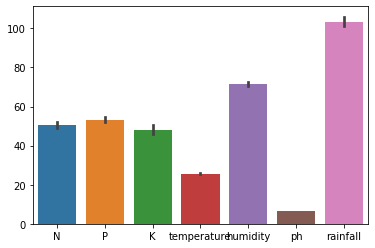

In [144]:
#Understanding the columns 
sns.barplot(data=Data)

Plotting different factors with crops

Text(0.5, 0, 'crops')

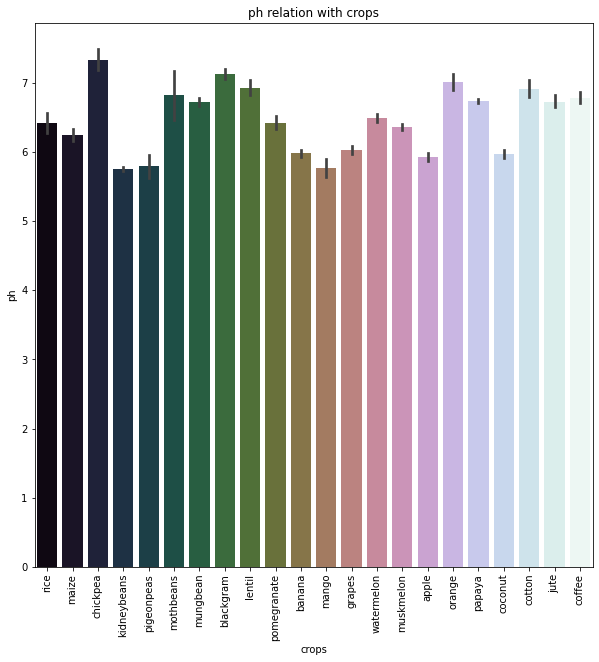

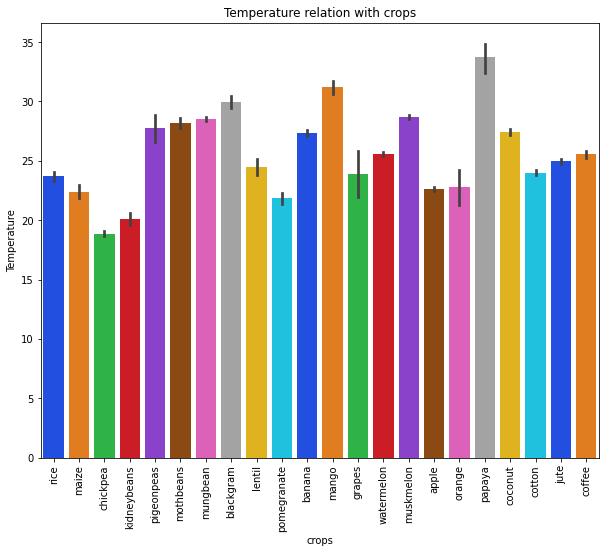

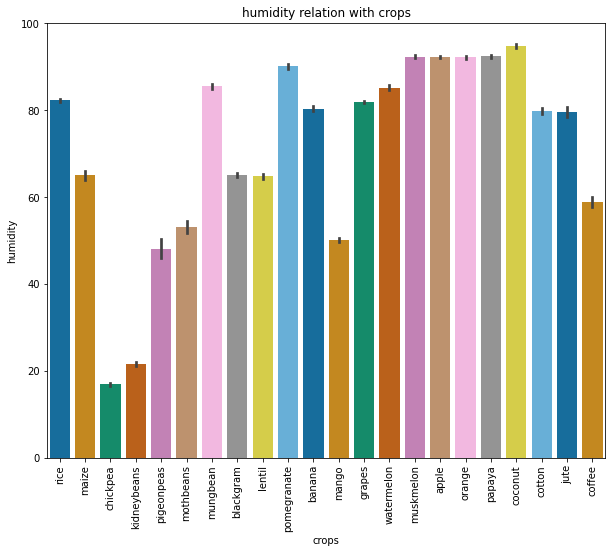

In [145]:
plt.figure(figsize=(10,10))
plt.title("ph relation with crops")
sns.barplot(y="ph",x="label", data=Data ,palette="cubehelix")
plt.xticks(rotation='vertical')
plt.ylabel("ph")
plt.xlabel("crops")
plt.figure(figsize=(10,8))
plt.title("Temperature relation with crops")
sns.barplot(y="temperature",x="label", data=Data ,palette='bright')
plt.xticks(rotation='vertical')
plt.ylabel("Temperature")
plt.xlabel("crops")
plt.figure(figsize=(10,8))
plt.title("humidity relation with crops")
sns.barplot(y="humidity",x="label", data=Data ,palette="colorblind")
plt.xticks(rotation='vertical')
plt.ylabel("humidity")
plt.xlabel("crops")

<AxesSubplot:>

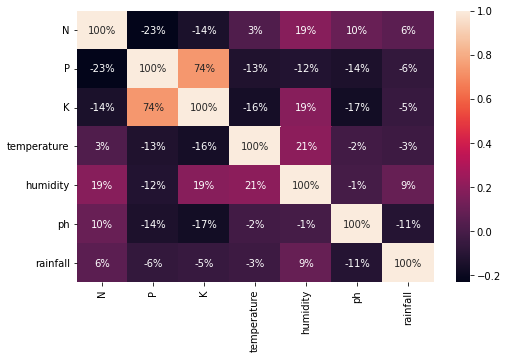

In [146]:
plt.figure(figsize=(8,5))
sns.heatmap(Data .corr(), annot =True, fmt= '.0%')

Text(0, 0.5, 'Crops')

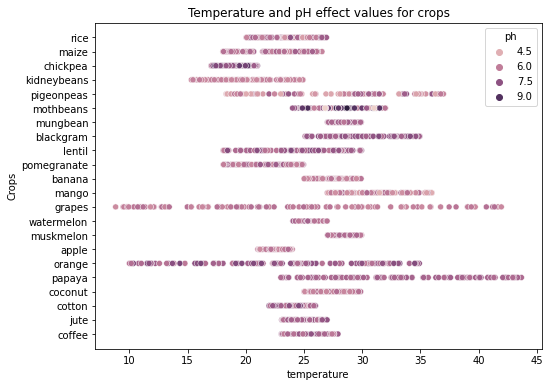

In [147]:
plt.figure(figsize=(8,6))
plt.title("Temperature and pH effect values for crops")
sns.scatterplot(data=Data , x="temperature", y="label", hue="ph")
plt.ylabel("Crops")

In [148]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

In [149]:
#Encoding label(i.e string format) to integer for training and testing model
LE = LabelEncoder()

Data ['label'] = LE.fit_transform(Data ['label'])
cropcat = {index : label for index, label in enumerate(LE.classes_)} 

In [150]:
x = Data.drop('label', axis = 1)
y = Data['label']

In [151]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)

DNN USING KERAS MODEL

In [152]:
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

In [153]:
a = tf.keras.Input(shape = (7, ))
b= tf.keras.layers.Dense(64, activation = 'relu')(a)
c = tf.keras.layers.Dense(22, activation = 'softmax')(b)

model = tf.keras.Model(a,c)

In [154]:
#Compiling keras model
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
#fitting model 
hist = model.fit(x_train,y_train,validation_split = 0.2,batch_size = 128,epochs = 100)

Epoch 1/100
11/11 [==============================] - 1s 29ms/step - loss: 47.2119 - accuracy: 0.0555 - val_loss: 32.3359 - val_accuracy: 0.0568
Epoch 2/100
11/11 [==============================] - 0s 7ms/step - loss: 29.2626 - accuracy: 0.0223 - val_loss: 19.7291 - val_accuracy: 0.0114
Epoch 3/100
11/11 [==============================] - 0s 7ms/step - loss: 17.8323 - accuracy: 0.0198 - val_loss: 13.3534 - val_accuracy: 0.0483
Epoch 4/100
11/11 [==============================] - 0s 7ms/step - loss: 11.1576 - accuracy: 0.1059 - val_loss: 8.4880 - val_accuracy: 0.1165
Epoch 5/100
11/11 [==============================] - 0s 7ms/step - loss: 6.9149 - accuracy: 0.2048 - val_loss: 4.6623 - val_accuracy: 0.2926
Epoch 6/100
11/11 [==============================] - 0s 7ms/step - loss: 3.5141 - accuracy: 0.3561 - val_loss: 2.1986 - val_accuracy: 0.3750
Epoch 7/100
11/11 [==============================] - 0s 7ms/step - loss: 1.8908 - accuracy: 0.4541 - val_loss: 1.3883 - val_accuracy: 0.5881
Epoch

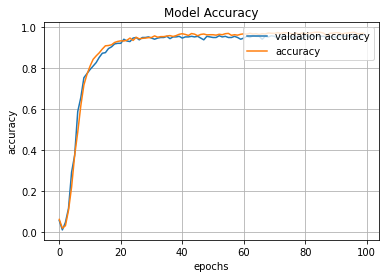

In [155]:
# Accuracy plot of the model
import matplotlib.pyplot as plt

plt.plot(hist.history['val_accuracy'],label='valdation accuracy')
plt.plot(hist.history['accuracy'],label='accuracy')
plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

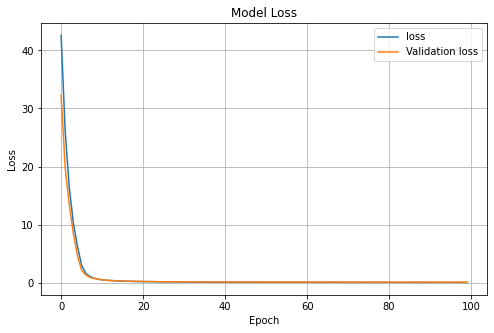

In [156]:
#Loss plot of the model
plt.figure(figsize = (8,5))

plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['val_loss'], label = 'Validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

In [157]:
#Classification report of keras model
import numpy as np
from sklearn.metrics import classification_report

predkeras = model.predict(x_test, batch_size = 128, verbose = 1)
pred = np.argmax(predkeras,axis = 1)
print(classification_report(y_test,pred))

4/4 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        25
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        17
           5       1.00      0.94      0.97        32
           6       0.95      0.90      0.92        20
           7       1.00      1.00      1.00        16
           8       0.76      0.94      0.84        17
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       0.91      0.91      0.91        22
          12       1.00      1.00      1.00        23
          13       0.95      1.00      0.97        19
          14       1.00      1.00      1.00        32
          15       1.00      1.00      1.00        18
          16       1.00      1

In [158]:
#Evaluating the loss and accuracy of the model 
loss, acc_km= model.evaluate(x_test, y_test)
print("Accuracy of the keras model :",acc_km*100)

14/14 [==============================] - 0s 992us/step - loss: 0.0742 - accuracy: 0.9773
Accuracy of the keras model : 97.72727489471436


In [159]:
accuracies = []
models = []
accuracies.append(acc_km)
models.append('predkeras')

Featuring the data


In [160]:
from sklearn.metrics import classification_report
from sklearn import metrics

In [161]:
#Feature selecion
targ = Data['label']
feat = Data[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]

In [162]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feat,targ,test_size = 0.2,random_state =2)

K-Nearest Neighbors

In [163]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)

predicted_values = knn.predict(x_test)

acc_knn = metrics.accuracy_score(y_test, predicted_values)
accuracies.append(acc_knn)
models.append('K Nearest Neighbours')
print("Accuracy of KNN is :  ", acc_knn*100)

Accuracy of KNN is :   97.5


In [164]:
print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.94      1.00      0.97        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       0.95      1.00      0.98        20
           7       1.00      1.00      1.00        18
           8       0.89      0.86      0.87        28
           9       0.93      1.00      0.97        14
          10       0.96      1.00      0.98        23
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        26
          13       1.00      0.89      0.94        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        29
          17       1.00    

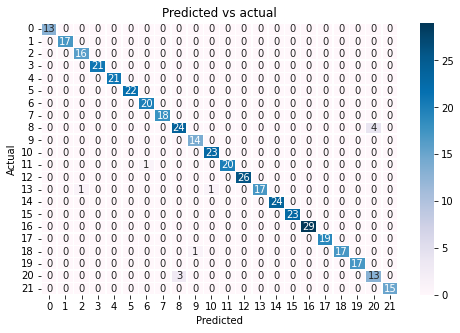

In [165]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.metrics import confusion_matrix

knncm = confusion_matrix(y_test,predicted_values) #Confusion Matrix for Predicted values

f1,ax1 = plt.subplots(figsize=(8,5))
sns.heatmap(knncm, annot=True, linewidth=0.5, fmt=".0f",cmap='PuBu', ax = ax1)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs actual')
plt.show()

In [167]:
import numpy as np
mean_accuracy = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    meanpred= knn.predict(x_test)
    mean_accuracy[i-1] = metrics.accuracy_score(y_test, meanpred)
mean_accuracy

array([0.97045455, 0.96363636, 0.97045455, 0.96363636, 0.975     ,
       0.975     , 0.97727273, 0.96818182, 0.97272727, 0.97045455,
       0.97272727, 0.96818182, 0.96818182, 0.96818182, 0.97045455,
       0.97045455, 0.97045455, 0.97272727, 0.97272727, 0.97272727])

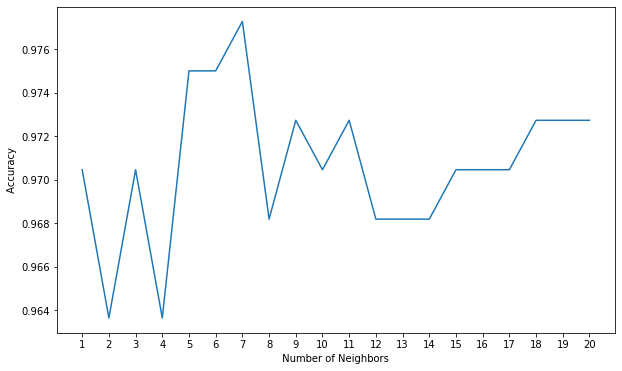

In [168]:
#Graph between number of neighbors and accuracy
import numpy as np
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_accuracy)
plt.xticks(loc)
plt.xlabel(' Number of Neighbors ')
plt.ylabel(' Accuracy ')
plt.show()

<AxesSubplot:title={'center':'Mean Predicted vs Mean actual'}>

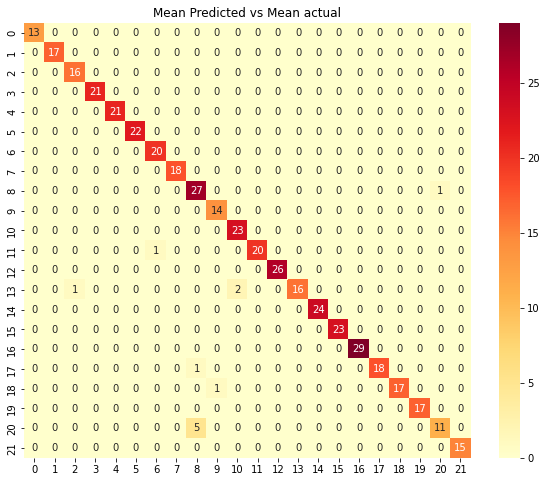

In [169]:
# Create a confusion matrix  
from sklearn.metrics import confusion_matrix
import numpy as np
plt.figure(figsize = (10,8))
cm = confusion_matrix(y_test, meanpred) #Confusion matrix for Mean Predicted values
plt.xlabel('Mean Predicted')
plt.ylabel('Mean Actual')
plt.title('Mean Predicted vs Mean actual')
# Plot heatmap for the confusion matrix:

sns.heatmap(cm, cmap='YlOrRd', annot = True, fmt = 'g')

Decision Tree

In [170]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
d = decisiontree.fit(x_train,y_train)

predicted_values = decisiontree.predict(x_test)

acc_dt = metrics.accuracy_score(y_test, predicted_values)
accuracies.append(acc_dt)
models.append('decisiontree')
print(" Accuracy of Decision Tree is: ", acc_dt*100)

 Accuracy of Decision Tree is:  98.63636363636363


In [171]:
print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.94      0.94      0.94        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.93      1.00      0.97        28
           9       1.00      1.00      1.00        14
          10       0.95      0.91      0.93        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       0.90      0.95      0.92        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        29
          17       1.00    

In [172]:
#import libraries for data visualization
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

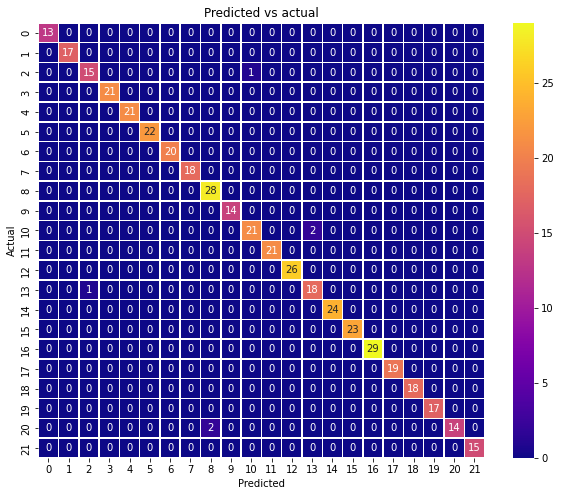

In [173]:
#creating a confusion matrix for predicted and actual values
from sklearn.metrics import confusion_matrix

cm_dt = confusion_matrix(y_test,predicted_values)

f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cm_dt, annot=True, linewidth=0.5, fmt=".0f",  cmap='plasma', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

Random Forest Algorithm

In [174]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(n_estimators=30, random_state=0)
randomforest.fit(x_train,y_train)

predicted_values = randomforest.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
accuracies.append(x)
models.append('Random Forest')
print("Accuracy of Random Forest is : ", x*100)

Accuracy of Random Forest is :  99.31818181818181


In [175]:
print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.94      1.00      0.97        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.93      1.00      0.97        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      0.95      0.97        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        29
          17       1.00    

In [176]:
print("Training accuracy = ",randomforest.score(x_train,y_train))
print("Testing accuracy = ",randomforest.score(x_test,y_test))

Training accuracy =  1.0
Testing accuracy =  0.9931818181818182


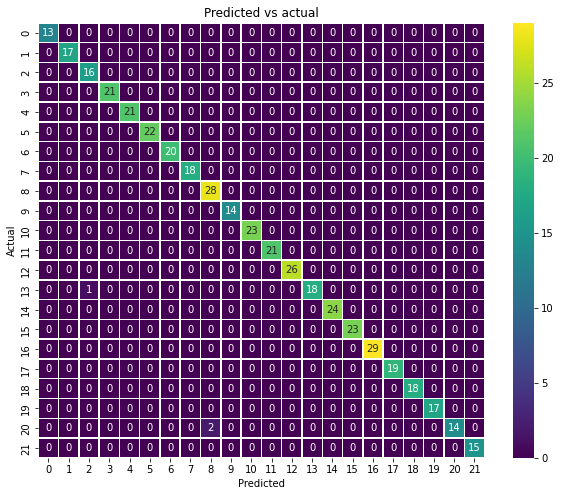

In [177]:
#Displaying confusion matrix of predicted and actual values
y_pred = randomforest.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

In [178]:
#Implementing mean accuracy of the model
mean_accrf = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    rf = RandomForestClassifier(n_estimators= i).fit(x_train,y_train)
    meanpredrf = rf.predict(x_test)
    mean_accrf[i-1] = metrics.accuracy_score(y_test, meanpredrf)

mean_accrf

array([0.92045455, 0.95227273, 0.975     , 0.97954545, 0.98636364,
       0.99318182, 0.99090909, 0.99318182, 0.99318182, 0.99090909,
       0.99090909, 0.99090909, 0.99545455, 0.99090909, 0.99090909,
       0.98863636, 0.99318182, 0.99318182, 0.98863636, 0.99318182])

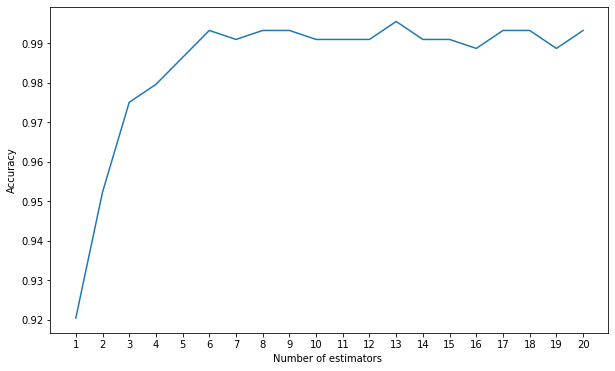

In [179]:
#Graph representing number of estimators with accuracy
import numpy as np
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_accrf)
plt.xticks(loc)
plt.xlabel('Number of estimators ')
plt.ylabel('Accuracy')
plt.show()

Text(0.5, 1.0, 'Mean Predicted vs Mean actual')

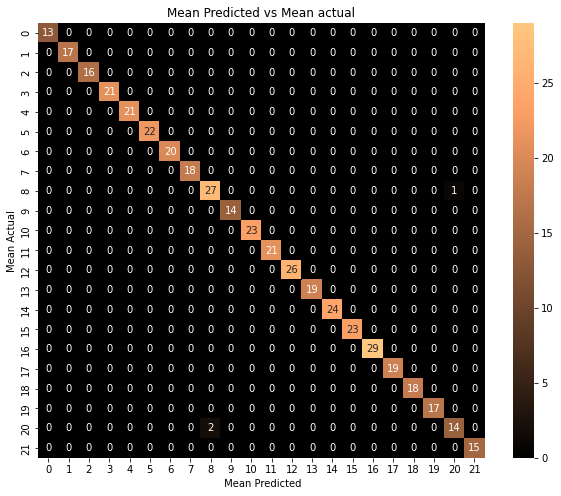

In [180]:
# Create a confusion matrix  
from sklearn.metrics import confusion_matrix
import numpy as np
cm = confusion_matrix(y_test, meanpredrf) #mean accuracy matrix

# Plot heatmap for the confusion matrix:
plt.figure(figsize = (10,8))
sns.heatmap(cm, cmap='copper', annot = True, fmt = 'g')
plt.xlabel(" Mean Predicted")
plt.ylabel("Mean Actual")
plt.title('Mean Predicted vs Mean actual')

Text(0.5, 0, 'crops')

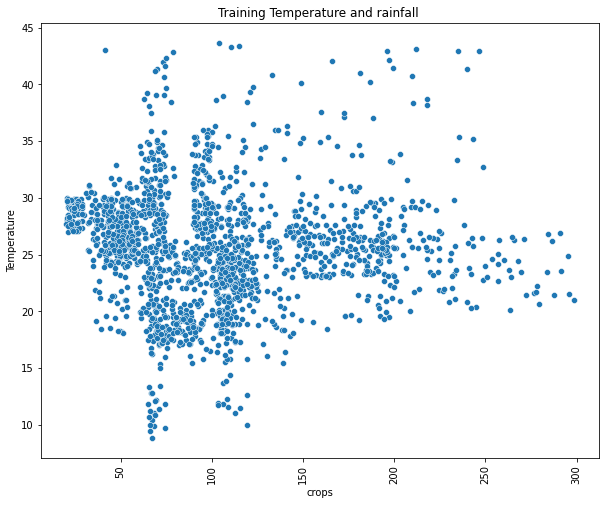

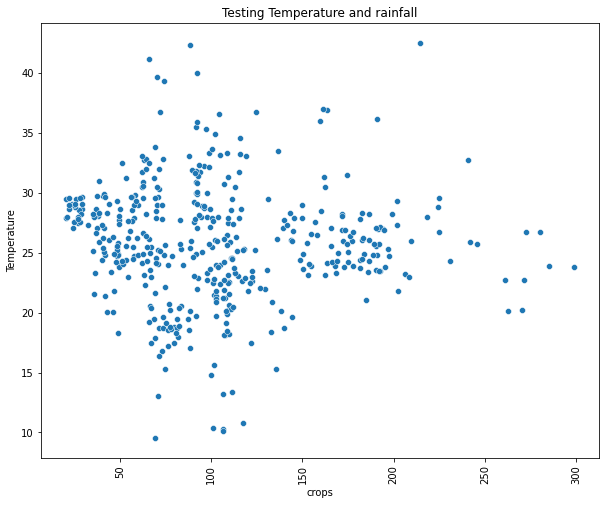

In [181]:
#Scatter plot to demonstrate temperature and rainfall and different training data with testing data
plt.figure(figsize=(10,8))
plt.title("Training Temperature and rainfall ")
sns.scatterplot(y="temperature",x="rainfall", data=x_train)
plt.xticks(rotation='vertical')
plt.ylabel("Temperature")
plt.xlabel("crops")
plt.figure(figsize=(10,8))
plt.title("Testing Temperature and rainfall")
sns.scatterplot(y="temperature",x="rainfall", data=x_test)
plt.xticks(rotation='vertical')
plt.ylabel("Temperature")
plt.xlabel("crops")

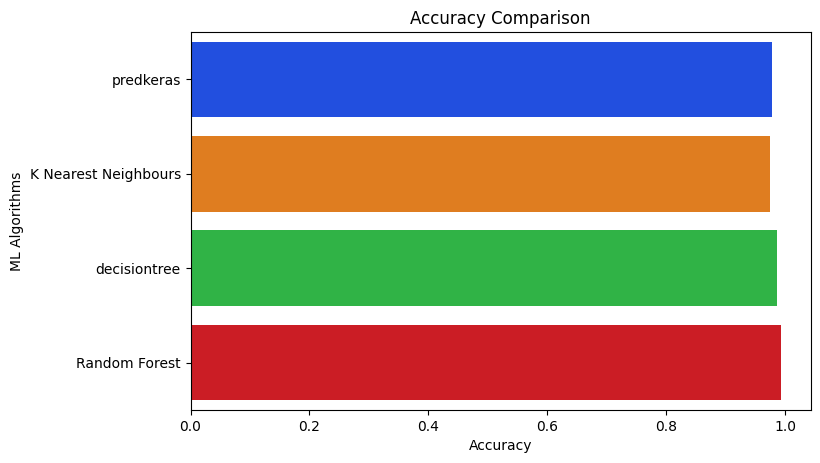

In [182]:
#Accuracy comparision of various model 
plt.figure(figsize=[8,5],dpi = 100, facecolor='white')
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('ML Algorithms')
sns.barplot(x = accuracies,y = models,palette='bright')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')



In [183]:
#Random Forest proves to be most accurate among the 4 models